## 18<sup>th</sup> of May, 2020
## Benjamin Adam Catching
## Coronavirus Simulation
## Andino Lab

Based on feedback from Friday the 15th, four changes need to be made to the current manuscript before sending it out. Here are all the scripts to create the figures of the paper.

In [1]:
# Import python packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy
import matplotlib.ticker as ticker
import matplotlib

In [3]:
final_time = 4200
# Make sure all dataframes have the same time
# g = mask %, h = shelter %, i = iteration #
for g in range(5):
    for h in range(5):
        for i in range(100):
            run_name = 'mask_per_' + str(g*2) + '0_shelter_' + str(h*2) + \
            '0_asymp_0.5_striter_' + str(i) + '.csv'
            dataname = '../../data/var_asympt_run/' + run_name
            f = open(dataname, 'r+')
            temp_lines = f.readlines()
            temp_line = temp_lines[-1]
            line_parts = temp_line.split(',')
            for i in range(int(line_parts[0]), final_time):
                new_line = str(i) + ',' + ','.join(line_parts[1:])
                f.write(new_line)
            f.close()

In [4]:
# Take simulation dataframe and return daily summary values
def sum_vals(df):
    """
    Take dataframe and add day, new infected, and cumulative 
    infected columns
    """
    
    # Define day values
    temp_days = df['time'].values // 24
    
    # Number of new infections per day
    new_infect = np.zeros(len(temp_days))
    cumul_infect = np.zeros(len(temp_days))
    new_total = 0
    for i in range(len(temp_days)):
        if i % 24 == 0:
            temp = sum(df['new infected'].iloc[i:i+24].values)
            new_total += temp
        new_infect[i] = temp
        cumul_infect[i] = new_total
    
    df['day'] = temp_days
    df['daily newly infected'] = new_infect
    df['total infected'] = cumul_infect
    temp = 0

In [5]:
new_dir = '../../data/var_asympt_run/'

# Extract the longest number of steps
max_steps = 0
# Import all files and add the new columns
for g in range(5):
    for h in range(5):
        for i in range(100):
            # g = mask %, h = shelter %, i = iteration #
            temp_fn = 'mask_per_' + str(g*2) + '0_shelter_' + str(h*2) + \
            '0_asymp_0.5_striter_' + str(i) + '.csv'
            
            # Read in file
            temp_file = new_dir + temp_fn
            temp_df = pd.read_csv(temp_file, header=1)
            
            print(temp_file)
            # Get the max value of the time
            time_values = temp_df['time'].values
            temp_max_time = time_values[-1]
            # Check is the value is greater
            if temp_max_time > max_steps:
                max_steps = temp_max_time
            
            # Add columns to dataframe
            sum_vals(temp_df)
            
            # Write new dataframe to file
            temp_df.to_csv(new_dir + temp_fn, sep=',', 
                           index_label=False)
print(max_steps)

../../data/var_asympt_run/mask_per_00_shelter_00_asymp_0.5_striter_0.csv
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_0.5_striter_1.csv
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_0.5_striter_2.csv
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_0.5_striter_3.csv
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_0.5_striter_4.csv
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_0.5_striter_5.csv
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_0.5_striter_6.csv
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_0.5_striter_7.csv
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_0.5_striter_8.csv
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_0.5_striter_9.csv
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_0.5_striter_10.csv
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_0.5_striter_11.csv
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_0.5_striter_12.csv
../../data/var_asympt_run/mask_per_00_shelter_00

../../data/var_asympt_run/mask_per_00_shelter_20_asymp_0.5_striter_11.csv
../../data/var_asympt_run/mask_per_00_shelter_20_asymp_0.5_striter_12.csv
../../data/var_asympt_run/mask_per_00_shelter_20_asymp_0.5_striter_13.csv
../../data/var_asympt_run/mask_per_00_shelter_20_asymp_0.5_striter_14.csv
../../data/var_asympt_run/mask_per_00_shelter_20_asymp_0.5_striter_15.csv
../../data/var_asympt_run/mask_per_00_shelter_20_asymp_0.5_striter_16.csv
../../data/var_asympt_run/mask_per_00_shelter_20_asymp_0.5_striter_17.csv
../../data/var_asympt_run/mask_per_00_shelter_20_asymp_0.5_striter_18.csv
../../data/var_asympt_run/mask_per_00_shelter_20_asymp_0.5_striter_19.csv
../../data/var_asympt_run/mask_per_00_shelter_20_asymp_0.5_striter_20.csv
../../data/var_asympt_run/mask_per_00_shelter_20_asymp_0.5_striter_21.csv
../../data/var_asympt_run/mask_per_00_shelter_20_asymp_0.5_striter_22.csv
../../data/var_asympt_run/mask_per_00_shelter_20_asymp_0.5_striter_23.csv
../../data/var_asympt_run/mask_per_00_

../../data/var_asympt_run/mask_per_00_shelter_40_asymp_0.5_striter_22.csv
../../data/var_asympt_run/mask_per_00_shelter_40_asymp_0.5_striter_23.csv
../../data/var_asympt_run/mask_per_00_shelter_40_asymp_0.5_striter_24.csv
../../data/var_asympt_run/mask_per_00_shelter_40_asymp_0.5_striter_25.csv
../../data/var_asympt_run/mask_per_00_shelter_40_asymp_0.5_striter_26.csv
../../data/var_asympt_run/mask_per_00_shelter_40_asymp_0.5_striter_27.csv
../../data/var_asympt_run/mask_per_00_shelter_40_asymp_0.5_striter_28.csv
../../data/var_asympt_run/mask_per_00_shelter_40_asymp_0.5_striter_29.csv
../../data/var_asympt_run/mask_per_00_shelter_40_asymp_0.5_striter_30.csv
../../data/var_asympt_run/mask_per_00_shelter_40_asymp_0.5_striter_31.csv
../../data/var_asympt_run/mask_per_00_shelter_40_asymp_0.5_striter_32.csv
../../data/var_asympt_run/mask_per_00_shelter_40_asymp_0.5_striter_33.csv
../../data/var_asympt_run/mask_per_00_shelter_40_asymp_0.5_striter_34.csv
../../data/var_asympt_run/mask_per_00_

../../data/var_asympt_run/mask_per_00_shelter_60_asymp_0.5_striter_33.csv
../../data/var_asympt_run/mask_per_00_shelter_60_asymp_0.5_striter_34.csv
../../data/var_asympt_run/mask_per_00_shelter_60_asymp_0.5_striter_35.csv
../../data/var_asympt_run/mask_per_00_shelter_60_asymp_0.5_striter_36.csv
../../data/var_asympt_run/mask_per_00_shelter_60_asymp_0.5_striter_37.csv
../../data/var_asympt_run/mask_per_00_shelter_60_asymp_0.5_striter_38.csv
../../data/var_asympt_run/mask_per_00_shelter_60_asymp_0.5_striter_39.csv
../../data/var_asympt_run/mask_per_00_shelter_60_asymp_0.5_striter_40.csv
../../data/var_asympt_run/mask_per_00_shelter_60_asymp_0.5_striter_41.csv
../../data/var_asympt_run/mask_per_00_shelter_60_asymp_0.5_striter_42.csv
../../data/var_asympt_run/mask_per_00_shelter_60_asymp_0.5_striter_43.csv
../../data/var_asympt_run/mask_per_00_shelter_60_asymp_0.5_striter_44.csv
../../data/var_asympt_run/mask_per_00_shelter_60_asymp_0.5_striter_45.csv
../../data/var_asympt_run/mask_per_00_

../../data/var_asympt_run/mask_per_00_shelter_80_asymp_0.5_striter_44.csv
../../data/var_asympt_run/mask_per_00_shelter_80_asymp_0.5_striter_45.csv
../../data/var_asympt_run/mask_per_00_shelter_80_asymp_0.5_striter_46.csv
../../data/var_asympt_run/mask_per_00_shelter_80_asymp_0.5_striter_47.csv
../../data/var_asympt_run/mask_per_00_shelter_80_asymp_0.5_striter_48.csv
../../data/var_asympt_run/mask_per_00_shelter_80_asymp_0.5_striter_49.csv
../../data/var_asympt_run/mask_per_00_shelter_80_asymp_0.5_striter_50.csv
../../data/var_asympt_run/mask_per_00_shelter_80_asymp_0.5_striter_51.csv
../../data/var_asympt_run/mask_per_00_shelter_80_asymp_0.5_striter_52.csv
../../data/var_asympt_run/mask_per_00_shelter_80_asymp_0.5_striter_53.csv
../../data/var_asympt_run/mask_per_00_shelter_80_asymp_0.5_striter_54.csv
../../data/var_asympt_run/mask_per_00_shelter_80_asymp_0.5_striter_55.csv
../../data/var_asympt_run/mask_per_00_shelter_80_asymp_0.5_striter_56.csv
../../data/var_asympt_run/mask_per_00_

../../data/var_asympt_run/mask_per_20_shelter_00_asymp_0.5_striter_55.csv
../../data/var_asympt_run/mask_per_20_shelter_00_asymp_0.5_striter_56.csv
../../data/var_asympt_run/mask_per_20_shelter_00_asymp_0.5_striter_57.csv
../../data/var_asympt_run/mask_per_20_shelter_00_asymp_0.5_striter_58.csv
../../data/var_asympt_run/mask_per_20_shelter_00_asymp_0.5_striter_59.csv
../../data/var_asympt_run/mask_per_20_shelter_00_asymp_0.5_striter_60.csv
../../data/var_asympt_run/mask_per_20_shelter_00_asymp_0.5_striter_61.csv
../../data/var_asympt_run/mask_per_20_shelter_00_asymp_0.5_striter_62.csv
../../data/var_asympt_run/mask_per_20_shelter_00_asymp_0.5_striter_63.csv
../../data/var_asympt_run/mask_per_20_shelter_00_asymp_0.5_striter_64.csv
../../data/var_asympt_run/mask_per_20_shelter_00_asymp_0.5_striter_65.csv
../../data/var_asympt_run/mask_per_20_shelter_00_asymp_0.5_striter_66.csv
../../data/var_asympt_run/mask_per_20_shelter_00_asymp_0.5_striter_67.csv
../../data/var_asympt_run/mask_per_20_

../../data/var_asympt_run/mask_per_20_shelter_20_asymp_0.5_striter_66.csv
../../data/var_asympt_run/mask_per_20_shelter_20_asymp_0.5_striter_67.csv
../../data/var_asympt_run/mask_per_20_shelter_20_asymp_0.5_striter_68.csv
../../data/var_asympt_run/mask_per_20_shelter_20_asymp_0.5_striter_69.csv
../../data/var_asympt_run/mask_per_20_shelter_20_asymp_0.5_striter_70.csv
../../data/var_asympt_run/mask_per_20_shelter_20_asymp_0.5_striter_71.csv
../../data/var_asympt_run/mask_per_20_shelter_20_asymp_0.5_striter_72.csv
../../data/var_asympt_run/mask_per_20_shelter_20_asymp_0.5_striter_73.csv
../../data/var_asympt_run/mask_per_20_shelter_20_asymp_0.5_striter_74.csv
../../data/var_asympt_run/mask_per_20_shelter_20_asymp_0.5_striter_75.csv
../../data/var_asympt_run/mask_per_20_shelter_20_asymp_0.5_striter_76.csv
../../data/var_asympt_run/mask_per_20_shelter_20_asymp_0.5_striter_77.csv
../../data/var_asympt_run/mask_per_20_shelter_20_asymp_0.5_striter_78.csv
../../data/var_asympt_run/mask_per_20_

../../data/var_asympt_run/mask_per_20_shelter_40_asymp_0.5_striter_77.csv
../../data/var_asympt_run/mask_per_20_shelter_40_asymp_0.5_striter_78.csv
../../data/var_asympt_run/mask_per_20_shelter_40_asymp_0.5_striter_79.csv
../../data/var_asympt_run/mask_per_20_shelter_40_asymp_0.5_striter_80.csv
../../data/var_asympt_run/mask_per_20_shelter_40_asymp_0.5_striter_81.csv
../../data/var_asympt_run/mask_per_20_shelter_40_asymp_0.5_striter_82.csv
../../data/var_asympt_run/mask_per_20_shelter_40_asymp_0.5_striter_83.csv
../../data/var_asympt_run/mask_per_20_shelter_40_asymp_0.5_striter_84.csv
../../data/var_asympt_run/mask_per_20_shelter_40_asymp_0.5_striter_85.csv
../../data/var_asympt_run/mask_per_20_shelter_40_asymp_0.5_striter_86.csv
../../data/var_asympt_run/mask_per_20_shelter_40_asymp_0.5_striter_87.csv
../../data/var_asympt_run/mask_per_20_shelter_40_asymp_0.5_striter_88.csv
../../data/var_asympt_run/mask_per_20_shelter_40_asymp_0.5_striter_89.csv
../../data/var_asympt_run/mask_per_20_

../../data/var_asympt_run/mask_per_20_shelter_60_asymp_0.5_striter_90.csv
../../data/var_asympt_run/mask_per_20_shelter_60_asymp_0.5_striter_91.csv
../../data/var_asympt_run/mask_per_20_shelter_60_asymp_0.5_striter_92.csv
../../data/var_asympt_run/mask_per_20_shelter_60_asymp_0.5_striter_93.csv
../../data/var_asympt_run/mask_per_20_shelter_60_asymp_0.5_striter_94.csv
../../data/var_asympt_run/mask_per_20_shelter_60_asymp_0.5_striter_95.csv
../../data/var_asympt_run/mask_per_20_shelter_60_asymp_0.5_striter_96.csv
../../data/var_asympt_run/mask_per_20_shelter_60_asymp_0.5_striter_97.csv
../../data/var_asympt_run/mask_per_20_shelter_60_asymp_0.5_striter_98.csv
../../data/var_asympt_run/mask_per_20_shelter_60_asymp_0.5_striter_99.csv
../../data/var_asympt_run/mask_per_20_shelter_80_asymp_0.5_striter_0.csv
../../data/var_asympt_run/mask_per_20_shelter_80_asymp_0.5_striter_1.csv
../../data/var_asympt_run/mask_per_20_shelter_80_asymp_0.5_striter_2.csv
../../data/var_asympt_run/mask_per_20_she

../../data/var_asympt_run/mask_per_40_shelter_00_asymp_0.5_striter_1.csv
../../data/var_asympt_run/mask_per_40_shelter_00_asymp_0.5_striter_2.csv
../../data/var_asympt_run/mask_per_40_shelter_00_asymp_0.5_striter_3.csv
../../data/var_asympt_run/mask_per_40_shelter_00_asymp_0.5_striter_4.csv
../../data/var_asympt_run/mask_per_40_shelter_00_asymp_0.5_striter_5.csv
../../data/var_asympt_run/mask_per_40_shelter_00_asymp_0.5_striter_6.csv
../../data/var_asympt_run/mask_per_40_shelter_00_asymp_0.5_striter_7.csv
../../data/var_asympt_run/mask_per_40_shelter_00_asymp_0.5_striter_8.csv
../../data/var_asympt_run/mask_per_40_shelter_00_asymp_0.5_striter_9.csv
../../data/var_asympt_run/mask_per_40_shelter_00_asymp_0.5_striter_10.csv
../../data/var_asympt_run/mask_per_40_shelter_00_asymp_0.5_striter_11.csv
../../data/var_asympt_run/mask_per_40_shelter_00_asymp_0.5_striter_12.csv
../../data/var_asympt_run/mask_per_40_shelter_00_asymp_0.5_striter_13.csv
../../data/var_asympt_run/mask_per_40_shelter_0

../../data/var_asympt_run/mask_per_40_shelter_20_asymp_0.5_striter_14.csv
../../data/var_asympt_run/mask_per_40_shelter_20_asymp_0.5_striter_15.csv
../../data/var_asympt_run/mask_per_40_shelter_20_asymp_0.5_striter_16.csv
../../data/var_asympt_run/mask_per_40_shelter_20_asymp_0.5_striter_17.csv
../../data/var_asympt_run/mask_per_40_shelter_20_asymp_0.5_striter_18.csv
../../data/var_asympt_run/mask_per_40_shelter_20_asymp_0.5_striter_19.csv
../../data/var_asympt_run/mask_per_40_shelter_20_asymp_0.5_striter_20.csv
../../data/var_asympt_run/mask_per_40_shelter_20_asymp_0.5_striter_21.csv
../../data/var_asympt_run/mask_per_40_shelter_20_asymp_0.5_striter_22.csv
../../data/var_asympt_run/mask_per_40_shelter_20_asymp_0.5_striter_23.csv
../../data/var_asympt_run/mask_per_40_shelter_20_asymp_0.5_striter_24.csv
../../data/var_asympt_run/mask_per_40_shelter_20_asymp_0.5_striter_25.csv
../../data/var_asympt_run/mask_per_40_shelter_20_asymp_0.5_striter_26.csv
../../data/var_asympt_run/mask_per_40_

../../data/var_asympt_run/mask_per_40_shelter_40_asymp_0.5_striter_26.csv
../../data/var_asympt_run/mask_per_40_shelter_40_asymp_0.5_striter_27.csv
../../data/var_asympt_run/mask_per_40_shelter_40_asymp_0.5_striter_28.csv
../../data/var_asympt_run/mask_per_40_shelter_40_asymp_0.5_striter_29.csv
../../data/var_asympt_run/mask_per_40_shelter_40_asymp_0.5_striter_30.csv
../../data/var_asympt_run/mask_per_40_shelter_40_asymp_0.5_striter_31.csv
../../data/var_asympt_run/mask_per_40_shelter_40_asymp_0.5_striter_32.csv
../../data/var_asympt_run/mask_per_40_shelter_40_asymp_0.5_striter_33.csv
../../data/var_asympt_run/mask_per_40_shelter_40_asymp_0.5_striter_34.csv
../../data/var_asympt_run/mask_per_40_shelter_40_asymp_0.5_striter_35.csv
../../data/var_asympt_run/mask_per_40_shelter_40_asymp_0.5_striter_36.csv
../../data/var_asympt_run/mask_per_40_shelter_40_asymp_0.5_striter_37.csv
../../data/var_asympt_run/mask_per_40_shelter_40_asymp_0.5_striter_38.csv
../../data/var_asympt_run/mask_per_40_

../../data/var_asympt_run/mask_per_40_shelter_60_asymp_0.5_striter_37.csv
../../data/var_asympt_run/mask_per_40_shelter_60_asymp_0.5_striter_38.csv
../../data/var_asympt_run/mask_per_40_shelter_60_asymp_0.5_striter_39.csv
../../data/var_asympt_run/mask_per_40_shelter_60_asymp_0.5_striter_40.csv
../../data/var_asympt_run/mask_per_40_shelter_60_asymp_0.5_striter_41.csv
../../data/var_asympt_run/mask_per_40_shelter_60_asymp_0.5_striter_42.csv
../../data/var_asympt_run/mask_per_40_shelter_60_asymp_0.5_striter_43.csv
../../data/var_asympt_run/mask_per_40_shelter_60_asymp_0.5_striter_44.csv
../../data/var_asympt_run/mask_per_40_shelter_60_asymp_0.5_striter_45.csv
../../data/var_asympt_run/mask_per_40_shelter_60_asymp_0.5_striter_46.csv
../../data/var_asympt_run/mask_per_40_shelter_60_asymp_0.5_striter_47.csv
../../data/var_asympt_run/mask_per_40_shelter_60_asymp_0.5_striter_48.csv
../../data/var_asympt_run/mask_per_40_shelter_60_asymp_0.5_striter_49.csv
../../data/var_asympt_run/mask_per_40_

../../data/var_asympt_run/mask_per_40_shelter_80_asymp_0.5_striter_48.csv
../../data/var_asympt_run/mask_per_40_shelter_80_asymp_0.5_striter_49.csv
../../data/var_asympt_run/mask_per_40_shelter_80_asymp_0.5_striter_50.csv
../../data/var_asympt_run/mask_per_40_shelter_80_asymp_0.5_striter_51.csv
../../data/var_asympt_run/mask_per_40_shelter_80_asymp_0.5_striter_52.csv
../../data/var_asympt_run/mask_per_40_shelter_80_asymp_0.5_striter_53.csv
../../data/var_asympt_run/mask_per_40_shelter_80_asymp_0.5_striter_54.csv
../../data/var_asympt_run/mask_per_40_shelter_80_asymp_0.5_striter_55.csv
../../data/var_asympt_run/mask_per_40_shelter_80_asymp_0.5_striter_56.csv
../../data/var_asympt_run/mask_per_40_shelter_80_asymp_0.5_striter_57.csv
../../data/var_asympt_run/mask_per_40_shelter_80_asymp_0.5_striter_58.csv
../../data/var_asympt_run/mask_per_40_shelter_80_asymp_0.5_striter_59.csv
../../data/var_asympt_run/mask_per_40_shelter_80_asymp_0.5_striter_60.csv
../../data/var_asympt_run/mask_per_40_

../../data/var_asympt_run/mask_per_60_shelter_00_asymp_0.5_striter_61.csv
../../data/var_asympt_run/mask_per_60_shelter_00_asymp_0.5_striter_62.csv
../../data/var_asympt_run/mask_per_60_shelter_00_asymp_0.5_striter_63.csv
../../data/var_asympt_run/mask_per_60_shelter_00_asymp_0.5_striter_64.csv
../../data/var_asympt_run/mask_per_60_shelter_00_asymp_0.5_striter_65.csv
../../data/var_asympt_run/mask_per_60_shelter_00_asymp_0.5_striter_66.csv
../../data/var_asympt_run/mask_per_60_shelter_00_asymp_0.5_striter_67.csv
../../data/var_asympt_run/mask_per_60_shelter_00_asymp_0.5_striter_68.csv
../../data/var_asympt_run/mask_per_60_shelter_00_asymp_0.5_striter_69.csv
../../data/var_asympt_run/mask_per_60_shelter_00_asymp_0.5_striter_70.csv
../../data/var_asympt_run/mask_per_60_shelter_00_asymp_0.5_striter_71.csv
../../data/var_asympt_run/mask_per_60_shelter_00_asymp_0.5_striter_72.csv
../../data/var_asympt_run/mask_per_60_shelter_00_asymp_0.5_striter_73.csv
../../data/var_asympt_run/mask_per_60_

../../data/var_asympt_run/mask_per_60_shelter_20_asymp_0.5_striter_74.csv
../../data/var_asympt_run/mask_per_60_shelter_20_asymp_0.5_striter_75.csv
../../data/var_asympt_run/mask_per_60_shelter_20_asymp_0.5_striter_76.csv
../../data/var_asympt_run/mask_per_60_shelter_20_asymp_0.5_striter_77.csv
../../data/var_asympt_run/mask_per_60_shelter_20_asymp_0.5_striter_78.csv
../../data/var_asympt_run/mask_per_60_shelter_20_asymp_0.5_striter_79.csv
../../data/var_asympt_run/mask_per_60_shelter_20_asymp_0.5_striter_80.csv
../../data/var_asympt_run/mask_per_60_shelter_20_asymp_0.5_striter_81.csv
../../data/var_asympt_run/mask_per_60_shelter_20_asymp_0.5_striter_82.csv
../../data/var_asympt_run/mask_per_60_shelter_20_asymp_0.5_striter_83.csv
../../data/var_asympt_run/mask_per_60_shelter_20_asymp_0.5_striter_84.csv
../../data/var_asympt_run/mask_per_60_shelter_20_asymp_0.5_striter_85.csv
../../data/var_asympt_run/mask_per_60_shelter_20_asymp_0.5_striter_86.csv
../../data/var_asympt_run/mask_per_60_

../../data/var_asympt_run/mask_per_60_shelter_40_asymp_0.5_striter_87.csv
../../data/var_asympt_run/mask_per_60_shelter_40_asymp_0.5_striter_88.csv
../../data/var_asympt_run/mask_per_60_shelter_40_asymp_0.5_striter_89.csv
../../data/var_asympt_run/mask_per_60_shelter_40_asymp_0.5_striter_90.csv
../../data/var_asympt_run/mask_per_60_shelter_40_asymp_0.5_striter_91.csv
../../data/var_asympt_run/mask_per_60_shelter_40_asymp_0.5_striter_92.csv
../../data/var_asympt_run/mask_per_60_shelter_40_asymp_0.5_striter_93.csv
../../data/var_asympt_run/mask_per_60_shelter_40_asymp_0.5_striter_94.csv
../../data/var_asympt_run/mask_per_60_shelter_40_asymp_0.5_striter_95.csv
../../data/var_asympt_run/mask_per_60_shelter_40_asymp_0.5_striter_96.csv
../../data/var_asympt_run/mask_per_60_shelter_40_asymp_0.5_striter_97.csv
../../data/var_asympt_run/mask_per_60_shelter_40_asymp_0.5_striter_98.csv
../../data/var_asympt_run/mask_per_60_shelter_40_asymp_0.5_striter_99.csv
../../data/var_asympt_run/mask_per_60_

../../data/var_asympt_run/mask_per_60_shelter_60_asymp_0.5_striter_98.csv
../../data/var_asympt_run/mask_per_60_shelter_60_asymp_0.5_striter_99.csv
../../data/var_asympt_run/mask_per_60_shelter_80_asymp_0.5_striter_0.csv
../../data/var_asympt_run/mask_per_60_shelter_80_asymp_0.5_striter_1.csv
../../data/var_asympt_run/mask_per_60_shelter_80_asymp_0.5_striter_2.csv
../../data/var_asympt_run/mask_per_60_shelter_80_asymp_0.5_striter_3.csv
../../data/var_asympt_run/mask_per_60_shelter_80_asymp_0.5_striter_4.csv
../../data/var_asympt_run/mask_per_60_shelter_80_asymp_0.5_striter_5.csv
../../data/var_asympt_run/mask_per_60_shelter_80_asymp_0.5_striter_6.csv
../../data/var_asympt_run/mask_per_60_shelter_80_asymp_0.5_striter_7.csv
../../data/var_asympt_run/mask_per_60_shelter_80_asymp_0.5_striter_8.csv
../../data/var_asympt_run/mask_per_60_shelter_80_asymp_0.5_striter_9.csv
../../data/var_asympt_run/mask_per_60_shelter_80_asymp_0.5_striter_10.csv
../../data/var_asympt_run/mask_per_60_shelter_80

../../data/var_asympt_run/mask_per_80_shelter_00_asymp_0.5_striter_9.csv
../../data/var_asympt_run/mask_per_80_shelter_00_asymp_0.5_striter_10.csv
../../data/var_asympt_run/mask_per_80_shelter_00_asymp_0.5_striter_11.csv
../../data/var_asympt_run/mask_per_80_shelter_00_asymp_0.5_striter_12.csv
../../data/var_asympt_run/mask_per_80_shelter_00_asymp_0.5_striter_13.csv
../../data/var_asympt_run/mask_per_80_shelter_00_asymp_0.5_striter_14.csv
../../data/var_asympt_run/mask_per_80_shelter_00_asymp_0.5_striter_15.csv
../../data/var_asympt_run/mask_per_80_shelter_00_asymp_0.5_striter_16.csv
../../data/var_asympt_run/mask_per_80_shelter_00_asymp_0.5_striter_17.csv
../../data/var_asympt_run/mask_per_80_shelter_00_asymp_0.5_striter_18.csv
../../data/var_asympt_run/mask_per_80_shelter_00_asymp_0.5_striter_19.csv
../../data/var_asympt_run/mask_per_80_shelter_00_asymp_0.5_striter_20.csv
../../data/var_asympt_run/mask_per_80_shelter_00_asymp_0.5_striter_21.csv
../../data/var_asympt_run/mask_per_80_s

../../data/var_asympt_run/mask_per_80_shelter_20_asymp_0.5_striter_20.csv
../../data/var_asympt_run/mask_per_80_shelter_20_asymp_0.5_striter_21.csv
../../data/var_asympt_run/mask_per_80_shelter_20_asymp_0.5_striter_22.csv
../../data/var_asympt_run/mask_per_80_shelter_20_asymp_0.5_striter_23.csv
../../data/var_asympt_run/mask_per_80_shelter_20_asymp_0.5_striter_24.csv
../../data/var_asympt_run/mask_per_80_shelter_20_asymp_0.5_striter_25.csv
../../data/var_asympt_run/mask_per_80_shelter_20_asymp_0.5_striter_26.csv
../../data/var_asympt_run/mask_per_80_shelter_20_asymp_0.5_striter_27.csv
../../data/var_asympt_run/mask_per_80_shelter_20_asymp_0.5_striter_28.csv
../../data/var_asympt_run/mask_per_80_shelter_20_asymp_0.5_striter_29.csv
../../data/var_asympt_run/mask_per_80_shelter_20_asymp_0.5_striter_30.csv
../../data/var_asympt_run/mask_per_80_shelter_20_asymp_0.5_striter_31.csv
../../data/var_asympt_run/mask_per_80_shelter_20_asymp_0.5_striter_32.csv
../../data/var_asympt_run/mask_per_80_

../../data/var_asympt_run/mask_per_80_shelter_40_asymp_0.5_striter_31.csv
../../data/var_asympt_run/mask_per_80_shelter_40_asymp_0.5_striter_32.csv
../../data/var_asympt_run/mask_per_80_shelter_40_asymp_0.5_striter_33.csv
../../data/var_asympt_run/mask_per_80_shelter_40_asymp_0.5_striter_34.csv
../../data/var_asympt_run/mask_per_80_shelter_40_asymp_0.5_striter_35.csv
../../data/var_asympt_run/mask_per_80_shelter_40_asymp_0.5_striter_36.csv
../../data/var_asympt_run/mask_per_80_shelter_40_asymp_0.5_striter_37.csv
../../data/var_asympt_run/mask_per_80_shelter_40_asymp_0.5_striter_38.csv
../../data/var_asympt_run/mask_per_80_shelter_40_asymp_0.5_striter_39.csv
../../data/var_asympt_run/mask_per_80_shelter_40_asymp_0.5_striter_40.csv
../../data/var_asympt_run/mask_per_80_shelter_40_asymp_0.5_striter_41.csv
../../data/var_asympt_run/mask_per_80_shelter_40_asymp_0.5_striter_42.csv
../../data/var_asympt_run/mask_per_80_shelter_40_asymp_0.5_striter_43.csv
../../data/var_asympt_run/mask_per_80_

../../data/var_asympt_run/mask_per_80_shelter_60_asymp_0.5_striter_42.csv
../../data/var_asympt_run/mask_per_80_shelter_60_asymp_0.5_striter_43.csv
../../data/var_asympt_run/mask_per_80_shelter_60_asymp_0.5_striter_44.csv
../../data/var_asympt_run/mask_per_80_shelter_60_asymp_0.5_striter_45.csv
../../data/var_asympt_run/mask_per_80_shelter_60_asymp_0.5_striter_46.csv
../../data/var_asympt_run/mask_per_80_shelter_60_asymp_0.5_striter_47.csv
../../data/var_asympt_run/mask_per_80_shelter_60_asymp_0.5_striter_48.csv
../../data/var_asympt_run/mask_per_80_shelter_60_asymp_0.5_striter_49.csv
../../data/var_asympt_run/mask_per_80_shelter_60_asymp_0.5_striter_50.csv
../../data/var_asympt_run/mask_per_80_shelter_60_asymp_0.5_striter_51.csv
../../data/var_asympt_run/mask_per_80_shelter_60_asymp_0.5_striter_52.csv
../../data/var_asympt_run/mask_per_80_shelter_60_asymp_0.5_striter_53.csv
../../data/var_asympt_run/mask_per_80_shelter_60_asymp_0.5_striter_54.csv
../../data/var_asympt_run/mask_per_80_

../../data/var_asympt_run/mask_per_80_shelter_80_asymp_0.5_striter_53.csv
../../data/var_asympt_run/mask_per_80_shelter_80_asymp_0.5_striter_54.csv
../../data/var_asympt_run/mask_per_80_shelter_80_asymp_0.5_striter_55.csv
../../data/var_asympt_run/mask_per_80_shelter_80_asymp_0.5_striter_56.csv
../../data/var_asympt_run/mask_per_80_shelter_80_asymp_0.5_striter_57.csv
../../data/var_asympt_run/mask_per_80_shelter_80_asymp_0.5_striter_58.csv
../../data/var_asympt_run/mask_per_80_shelter_80_asymp_0.5_striter_59.csv
../../data/var_asympt_run/mask_per_80_shelter_80_asymp_0.5_striter_60.csv
../../data/var_asympt_run/mask_per_80_shelter_80_asymp_0.5_striter_61.csv
../../data/var_asympt_run/mask_per_80_shelter_80_asymp_0.5_striter_62.csv
../../data/var_asympt_run/mask_per_80_shelter_80_asymp_0.5_striter_63.csv
../../data/var_asympt_run/mask_per_80_shelter_80_asymp_0.5_striter_64.csv
../../data/var_asympt_run/mask_per_80_shelter_80_asymp_0.5_striter_65.csv
../../data/var_asympt_run/mask_per_80_

0
1
2
3
4


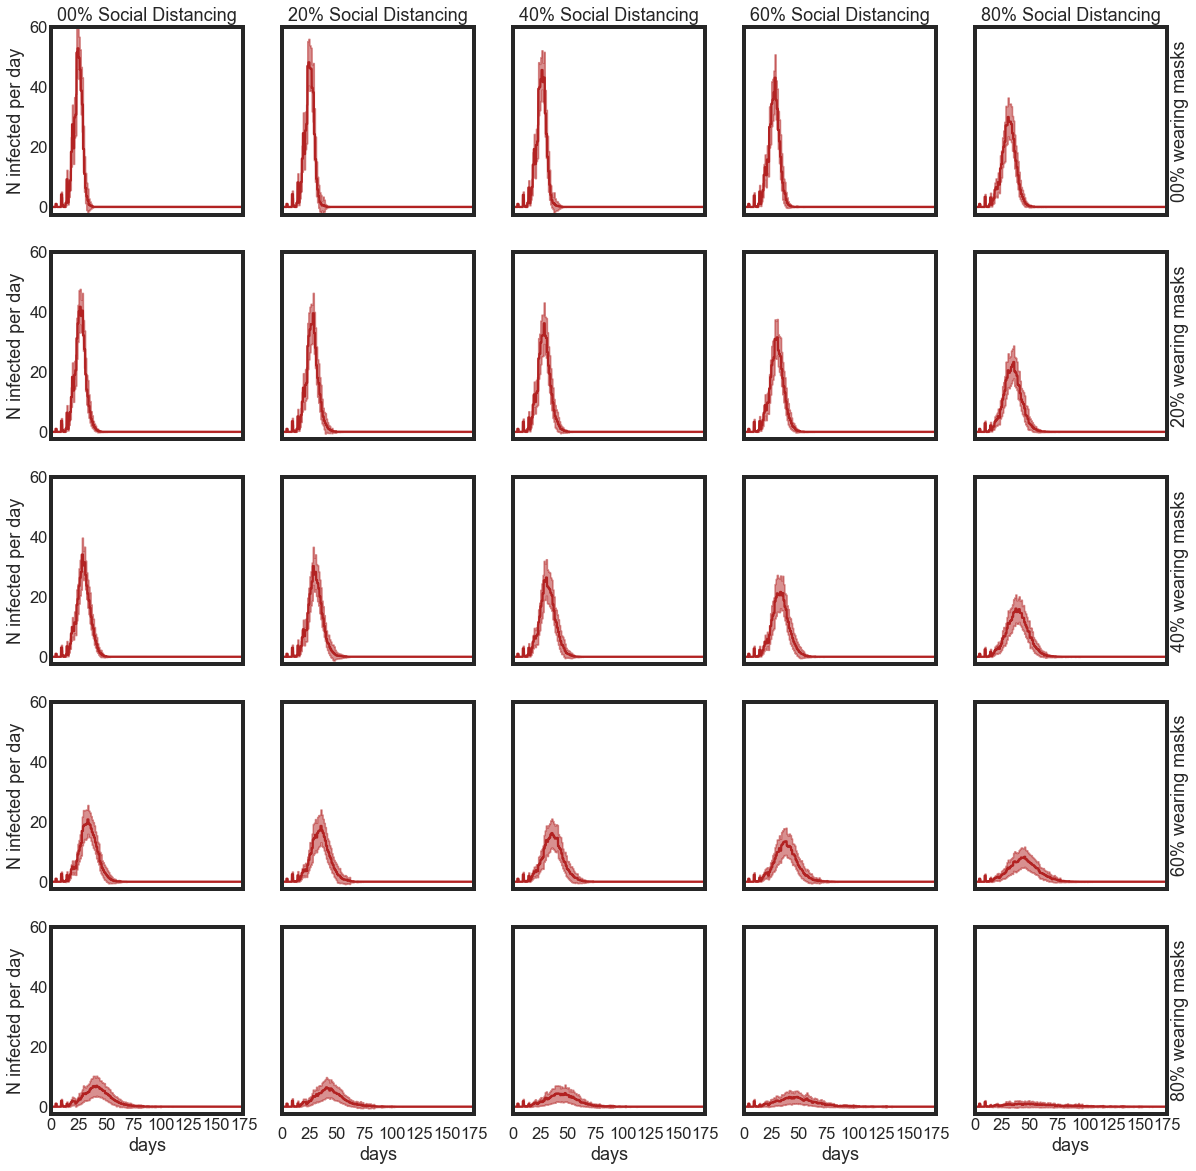

In [6]:
num_time_points = 4201

with sns.axes_style('white'):
    sns.set_context('talk')
    matplotlib.rcParams.update({'font.size': 22})
    fig, ax = plt.subplots(5, 5, figsize=(20, 20), sharey=True, sharex=True)
    for g in range(5):
        print(g)
        for h in range(5):
            # Array to store new infections
            new_infections = np.zeros((100, num_time_points))
            cumul_infections = np.zeros((100, num_time_points))
            for i in range(100):
                # g = mask %, h = shelter %, i = iteration #
                run_name = 'mask_per_' + str(h*2) + '0_shelter_' + \
                str(g*2) + '0_asymp_0.5_striter_' + str(i) + '.csv'
                
                dataname = '../../data/var_asympt_run/' + run_name
                temp_df = pd.read_csv(dataname)
                newly_infect_vals= temp_df['daily newly infected'].values
                cumul_vals = temp_df['total infected'].values
                for j in range(len(temp_df['time'])):
                    temp_new_infect = newly_infect_vals[j]
                    temp_cumul_infect = cumul_vals[j]
                    new_infections[i, j] = temp_new_infect
                    cumul_infections[i, j] = temp_cumul_infect

                # Mean of new infection 
                new_infect_mean = np.zeros(num_time_points)
                new_infect_std = np.zeros(num_time_points)
                cumul_infect_mean = np.zeros(num_time_points)
                cumul_infect_std = np.zeros(num_time_points)
                
                if i == 99:
                    for k in range(num_time_points):
                        new_infect_mean[k] = new_infections[:, k].mean()
                        new_infect_std[k] = new_infections[:, k].std()
                        cumul_infect_mean[k] = cumul_infections[:, k].mean()
                        cumul_infect_std[k] = cumul_infections[:, k].std()
                    time = np.linspace(1, num_time_points, num_time_points)
                    
                    _ = ax[h, g].spines['bottom'].set_linewidth(4)
                    _ = ax[h, g].spines['right'].set_linewidth(4)
                    _ = ax[h, g].spines['left'].set_linewidth(4)
                    _ = ax[h, g].spines['top'].set_linewidth(4)
                    _ = ax[h, g].margins(x=0,y=0)
                if h == 4 and i == 99:
                    
                    
                    _ = ax[h, g].set_xlabel('days')
                    _ = ax[h, g].fill_between(time, y2 = new_infect_mean + new_infect_std/2, 
                                                  y1 = new_infect_mean - new_infect_std/2, 
                                                  color = 'firebrick', alpha = .5)
                    _ = ax[h, g].plot(time, new_infect_mean, color='firebrick',
                                     label='number infected per day')
                elif h == 0 and i == 99:
                    
                    _ = ax[h, g].set_title(f'{g*2}0% Social Distancing')
                    if g == 0:
                        _ = ax[h, g].fill_between(time, y2 = new_infect_mean + new_infect_std/2, 
                                                  y1 = new_infect_mean - new_infect_std/2, 
                                                  color = 'firebrick', alpha = .5)
                        _ = ax[h, g].plot(time, new_infect_mean, color='firebrick',
                                         label='number infected per day')
                        _ = ax[h, g].set_xticks(np.linspace(0, 4200, 8))
                        _ = ax[h, g].set_xticklabels([int(x) for x in np.linspace(0, 175, 8)])
                        #_ = ax[h, g].set_ylim([0, 500])
                        #_ = ax[0, 0].legend()
                    else:
                        _ = ax[h, g].fill_between(time, y2 = new_infect_mean + new_infect_std/2, 
                                                  y1 = new_infect_mean - new_infect_std/2, 
                                                  color = 'firebrick', alpha = .5)
                        _ = ax[h, g].plot(time, new_infect_mean, color='firebrick')

                elif i == 99:
                    _ = ax[h, g].fill_between(time, y2 = new_infect_mean + new_infect_std/2, 
                                              y1 = new_infect_mean - new_infect_std/2, 
                                              color = 'firebrick', alpha = .5)
                    _ = ax[h, g].plot(time, new_infect_mean, color='firebrick')
                if g == 4 and i == 0:
                    
                    _ = ax[h, g].tick_params(which='both', length=0)
                    _ = ax2 = ax[h, g].twinx()
                    _ = ax2.set_ylabel(f'{h*2}0% wearing masks')
                    _ = ax2.set_yticks([])
                if g == 0 and i == 99:
                    _ = ax[h, g].set_ylabel('N infected per day')
                    _ = ax[h, g].set_yticks(np.linspace(0, 80, 5))
                    _ = ax[h, g].tick_params(which='both', length=0)
                    
    plt.savefig('../../large_mask_ten_samples_mean.png', dpi=100)
    plt.show()

In [7]:
# Function to find the day with half the number of cumulative infections
def half_infected(df):
    """
    From the dataframe of infection dynamics find infection halfway point
    """
    
    # Define the number of time points
    timepoints = len(df[['time']])
    # Get the cumulative infection time points
    c_infect = df['recovered'] + df['infected']
    all_infected = df[['infected']].values
    # Get the max number of infected
    max_infect = df['recovered'].values.max()
    # Get the final number of infected
    final_infect = c_infect.max()
    half_max = all_infected.max()
    # Iterate over time points
    for i, infected in enumerate(c_infect):
        if infected == half_max:
            peak_infect = all_infected[i]
            return [i, final_infect, peak_infect]
        if infected < half_max:
            if c_infect[i + 1] > half_max:
                peak_infect = all_infected[i]
                return [i, final_infect, half_max]

In [8]:
half_max_time = np.zeros((5, 5, 100))
max_num = np.zeros((5, 5, 100))
peak_num = np.zeros((5, 5, 100))
no_spread = np.zeros((5, 5, 100))
for i in range(100):
    for g in range(5):
        for h in range(5):
            # Name the datafile
            run_name = 'mask_per_' + str(h*2) + '0_shelter_' + \
            str(g*2) + '0_asymp_0.5_striter_' + str(i) + '.csv'

            dataname = '../../data/var_asympt_run/' + run_name
            temp_df = pd.read_csv(dataname)
            test_half_max = half_infected(temp_df)
            half_max_time[h, g, i] = test_half_max[0] / 24
            peak_num[h, g, i] = test_half_max[2]
            max_num[h, g, i] = test_half_max[1]
            if test_half_max[2] <= 15:
                no_spread[g, h, i] = 1
print(peak_num)

[[[185. 179.  84. ...  75.  86. 163.]
  [ 94.  79. 185. ...  92. 172. 182.]
  [ 84. 168. 173. ...  84. 173.  80.]
  [129.  51. 152. ...  77.  72. 158.]
  [ 46.  64.  50. ...  60.  56.  53.]]

 [[161.  71.  84. ...  64.  81. 139.]
  [154.  65.  82. ... 158. 144.  63.]
  [151. 136.  61. ...  68. 142. 134.]
  [ 69.  63. 138. ... 126.  58. 123.]
  [102.  58.  39. ...  58. 115. 101.]]

 [[127. 122. 146. ...  51.  71. 132.]
  [115. 118. 113. ...  51. 138.  66.]
  [  1.  55.  53. ...  52.  50.  57.]
  [ 36.  49.  55. ...  40.  45.  94.]
  [ 95.  42.  26. ...  45.  26.   1.]]

 [[ 89.  93.  31. ...  39.  35.  53.]
  [ 35.  94. 102. ...  46.  84.   1.]
  [  1.  94.  37. ...  33.  94.  95.]
  [  1.  35.  42. ...  24.  29.   1.]
  [ 18.  13.  23. ...  24.  17.   1.]]

 [[ 18.  13.  16. ...  13.  24.   1.]
  [  1.   1.  16. ...  14.  26.   1.]
  [  1.   9.  17. ...   2.  16.   1.]
  [  1.   6.  16. ...  16.  15.   1.]
  [  1.   2.   2. ...   5.   3.   1.]]]


In [9]:
half_max_time_mean = np.zeros((5, 5))
max_num_mean = np.zeros((5, 5))
peak_num_mean = np.zeros((5, 5))
no_spread_sum = np.zeros((5, 5))

half_max_time_std = np.zeros((5, 5))
max_num_std = np.zeros((5, 5))
peak_num_std = np.zeros((5, 5))

for h in range(5):
    for i in range(5):
        temp = no_spread[h, i].sum()
        no_spread_sum[h, i] = temp
        # Weight of infections with spread
        weight = (100 - temp) / 100
        max_num_mean[h, i] = max_num[h, i].mean() * weight
        half_max_time_mean[h, i] = half_max_time[h, i].mean()
        peak_num_mean[h, i] = peak_num[h, i].mean() * weight 
        
        half_max_time_std[h, i] = half_max_time[h, i].std()
        peak_num_std[h, i] = peak_num[h, i].std() * weight 
        max_num_std[h, i] = max_num[h, i].std() * weight

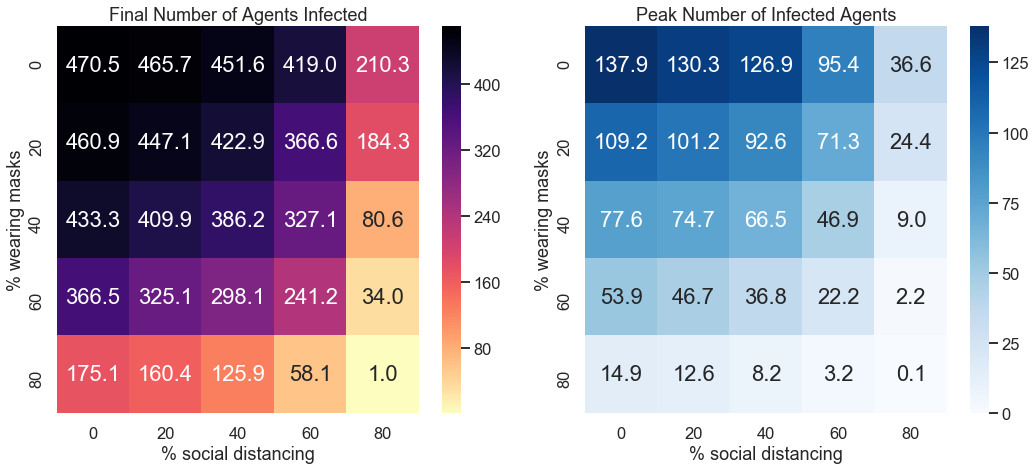

In [10]:
with sns.axes_style('white'):
    fig, ax = plt.subplots(1, 2, figsize=(15, 7))
    sns.heatmap(max_num_mean, fmt='.1f', cmap='magma_r', annot=True, ax=ax[0])
    _ = ax[0].set_xticks(np.linspace(0.5, 4.5, 5))
    _ = ax[0].set_yticks(np.linspace(0.5, 4.5, 5))
    _ = ax[0].set_xticklabels(np.linspace(0, 80, 5).astype(int))
    _ = ax[0].set_yticklabels(np.linspace(0, 80, 5).astype(int))
    _ = ax[0].set_ylabel('% wearing masks')
    _ = ax[0].set_xlabel('% social distancing')
    _ = ax[0].set_title('Final Number of Agents Infected')
    
    #sns.heatmap(half_max_time_mean, fmt="d", cmap='viridis', annot=True, ax=ax[1, 1])
    sns.heatmap(peak_num_mean, cmap='Blues', fmt='.1f', annot=True, ax=ax[1])
    _ = ax[1].set_xticks(np.linspace(0.5, 4.5, 5))
    _ = ax[1].set_yticks(np.linspace(0.5, 4.5, 5))
    _ = ax[1].set_xticklabels(np.linspace(0, 80, 5).astype(int))
    _ = ax[1].set_yticklabels(np.linspace(0, 80, 5).astype(int))
    _ = ax[1].set_ylabel('% wearing masks')
    _ = ax[1].set_xlabel('% social distancing')
    _ = ax[1].set_title('Peak Number of Infected Agents')
    plt.tight_layout()
    
    
    plt.savefig('../../Summary_values.png', dpi=100)
    plt.show()

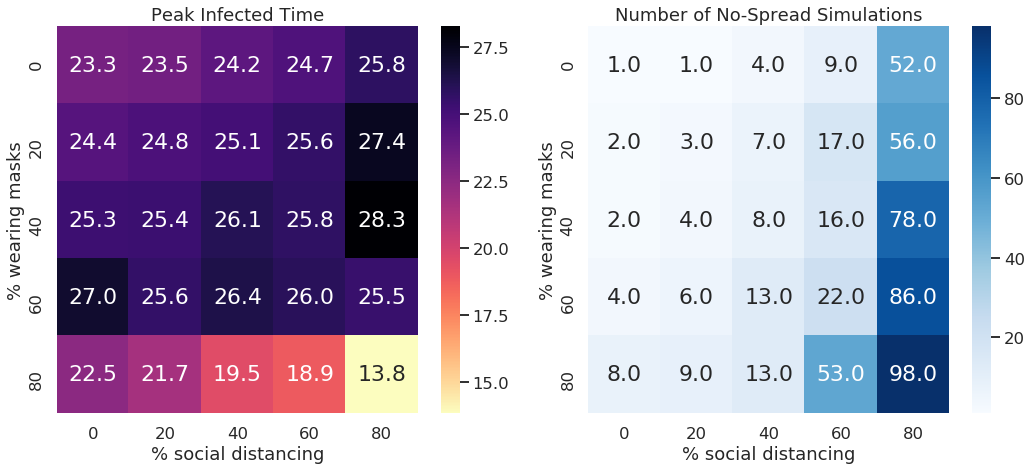

In [11]:
with sns.axes_style('white'):
    fig, ax = plt.subplots(1, 2, figsize=(15, 7))
    sns.heatmap(half_max_time_mean, fmt='.1f', cmap='magma_r', annot=True, ax=ax[0])
    _ = ax[0].set_xticks(np.linspace(0.5, 4.5, 5))
    _ = ax[0].set_yticks(np.linspace(0.5, 4.5, 5))
    _ = ax[0].set_xticklabels(np.linspace(0, 80, 5).astype(int))
    _ = ax[0].set_yticklabels(np.linspace(0, 80, 5).astype(int))
    _ = ax[0].set_ylabel('% wearing masks')
    _ = ax[0].set_xlabel('% social distancing')
    _ = ax[0].set_title('Peak Infected Time')
    
    #sns.heatmap(half_max_time_mean, fmt="d", cmap='viridis', annot=True, ax=ax[1, 1])
    sns.heatmap(no_spread_sum, cmap='Blues', fmt='.1f', annot=True, ax=ax[1])
    _ = ax[1].set_xticks(np.linspace(0.5, 4.5, 5))
    _ = ax[1].set_yticks(np.linspace(0.5, 4.5, 5))
    _ = ax[1].set_xticklabels(np.linspace(0, 80, 5).astype(int))
    _ = ax[1].set_yticklabels(np.linspace(0, 80, 5).astype(int))
    _ = ax[1].set_ylabel('% wearing masks')
    _ = ax[1].set_xlabel('% social distancing')
    _ = ax[1].set_title('Number of No-Spread Simulations')
    plt.tight_layout()
    
plt.show()

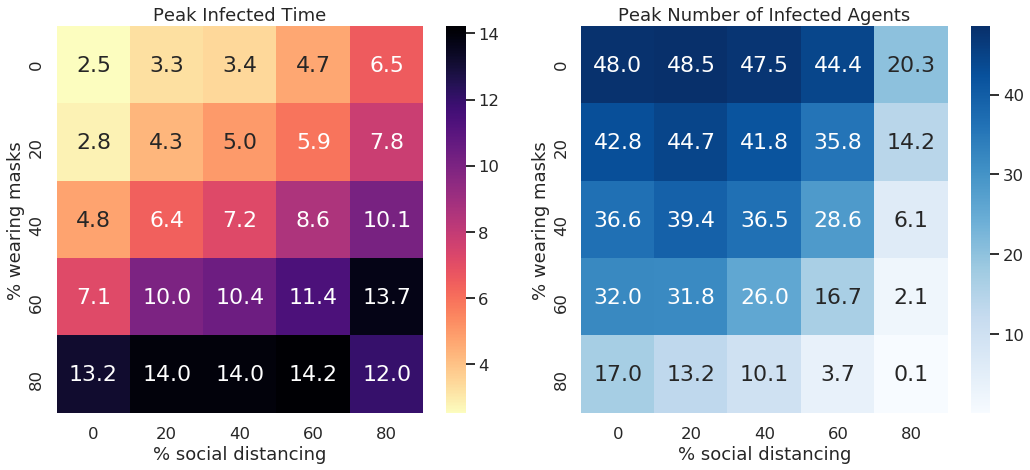

In [12]:
with sns.axes_style('white'):
    fig, ax = plt.subplots(1, 2, figsize=(15, 7))
    sns.heatmap(half_max_time_std, fmt='.1f', cmap='magma_r', annot=True, ax=ax[0])
    _ = ax[0].set_xticks(np.linspace(0.5, 4.5, 5))
    _ = ax[0].set_yticks(np.linspace(0.5, 4.5, 5))
    _ = ax[0].set_xticklabels(np.linspace(0, 80, 5).astype(int))
    _ = ax[0].set_yticklabels(np.linspace(0, 80, 5).astype(int))
    _ = ax[0].set_ylabel('% wearing masks')
    _ = ax[0].set_xlabel('% social distancing')
    _ = ax[0].set_title('Peak Infected Time')
    
    #sns.heatmap(half_max_time_mean, fmt="d", cmap='viridis', annot=True, ax=ax[1, 1])
    sns.heatmap(peak_num_std, cmap='Blues', fmt='.1f', annot=True, ax=ax[1])
    _ = ax[1].set_xticks(np.linspace(0.5, 4.5, 5))
    _ = ax[1].set_yticks(np.linspace(0.5, 4.5, 5))
    _ = ax[1].set_xticklabels(np.linspace(0, 80, 5).astype(int))
    _ = ax[1].set_yticklabels(np.linspace(0, 80, 5).astype(int))
    _ = ax[1].set_ylabel('% wearing masks')
    _ = ax[1].set_xlabel('% social distancing')
    _ = ax[1].set_title('Peak Number of Infected Agents')
    plt.tight_layout()
    
plt.show()

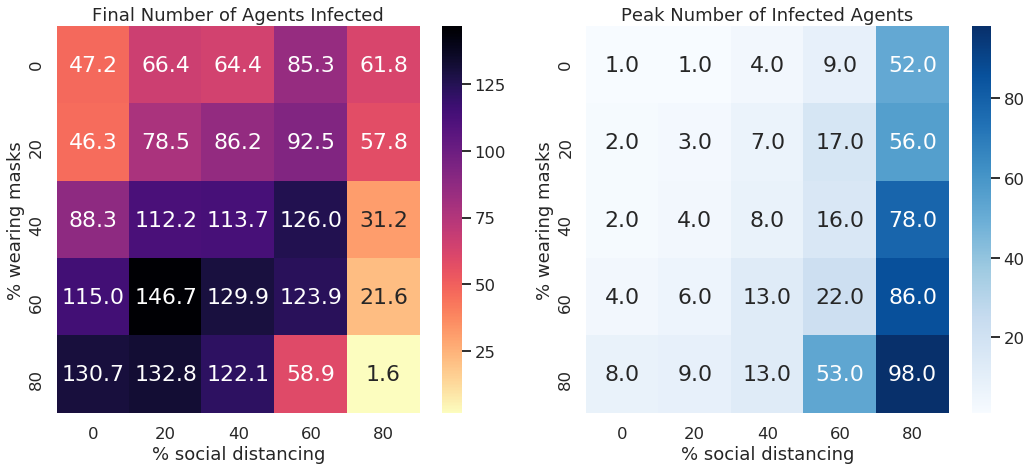

In [13]:
with sns.axes_style('white'):
    fig, ax = plt.subplots(1, 2, figsize=(15, 7))
    sns.heatmap(max_num_std, fmt='.1f', cmap='magma_r', annot=True, ax=ax[0])
    _ = ax[0].set_xticks(np.linspace(0.5, 4.5, 5))
    _ = ax[0].set_yticks(np.linspace(0.5, 4.5, 5))
    _ = ax[0].set_xticklabels(np.linspace(0, 80, 5).astype(int))
    _ = ax[0].set_yticklabels(np.linspace(0, 80, 5).astype(int))
    _ = ax[0].set_ylabel('% wearing masks')
    _ = ax[0].set_xlabel('% social distancing')
    _ = ax[0].set_title('Final Number of Agents Infected')
    
    #sns.heatmap(half_max_time_mean, fmt="d", cmap='viridis', annot=True, ax=ax[1, 1])
    sns.heatmap(no_spread_sum, cmap='Blues', fmt='.1f', annot=True, ax=ax[1])
    _ = ax[1].set_xticks(np.linspace(0.5, 4.5, 5))
    _ = ax[1].set_yticks(np.linspace(0.5, 4.5, 5))
    _ = ax[1].set_xticklabels(np.linspace(0, 80, 5).astype(int))
    _ = ax[1].set_yticklabels(np.linspace(0, 80, 5).astype(int))
    _ = ax[1].set_ylabel('% wearing masks')
    _ = ax[1].set_xlabel('% social distancing')
    _ = ax[1].set_title('Peak Number of Infected Agents')
    plt.tight_layout()

In [15]:
# Adjust dataframes of 25%and 75% asymptomatic
# g = mask %, h = shelter %, i = iteration #
for g in range(5):
    for h in range(5):
        for k in range(10):
            asympt_vals = ['0.25', '0.75']
            for j in asympt_vals:
                run_name = 'mask_per_' + str(g*2) + '0_shelter_' + str(h*2) + \
                '0_asymp_' + j + '_striter_' + str(k) + '.csv'
                dataname = '../../data/var_asympt_run/' + run_name
                f = open(dataname, 'r+')
                temp_lines = f.readlines()
                temp_line = temp_lines[-1]
                line_parts = temp_line.split(',')
                for i in range(int(line_parts[0]), final_time):
                    new_line = str(i) + ',' + ','.join(line_parts[1:])
                    f.write(new_line)
                f.close()

In [27]:
# Create the data frame
summary_df = [['% wearing masks', '% social distancing', '% asymptomatic', 'peak number of infected' , 'halfway point']]
# Iterate over % wearing masks
for g in range(5):
    # Iterate over % social distancing
    for h in range(5):
        # Iterate over the replicates
        for i in range(10):
            # Iterate over the % asymptomatic
            for j in range(3):
                asymp = str(.25 * (j+1))
                # Get the name of the file
                run_name = 'mask_per_' + str(g*2) + '0_shelter_' + \
                str(h*2) + '0_asymp_' + asymp + '_striter_' + str(i) + '.csv'
                dataname = '../../data/var_asympt_run/' + run_name
                # Import as dataframe
                if j in [0, 2]:
                    temp_df = pd.read_csv(dataname, header=1)
                else:
                    temp_df = pd.read_csv(dataname)
                # Get the peak number of infected
                test_half_max = half_infected(temp_df)
                peak_num = test_half_max[2]
                half_point = test_half_max[0] / 24
                if type(peak_num) == list:
                    temp_peak = peak_num[0]
                else:
                    temp_peak = peak_num
                
                # Test array of values
                temp_array = [g*20, h*20, 25*(j+1), temp_peak, half_point]
                summary_df.append(temp_array)

In [31]:
temp_header = ['% wearing masks', '% social distancing', 
               '% asymptomatic', 'peak number of infected', 'halfway point']
sum_df = pd.DataFrame(summary_df[1:])  
sum_df.columns = temp_header
sum_df['peak number of infected'] = sum_df['peak number of infected'].astype(int)

sum_df.head()

,% wearing masks,% social distancing,% asymptomatic,peak number of infected,halfway point
0,0,0,25,23,21.916667
1,0,0,50,185,24.000000
2,0,0,75,180,25.375000
3,0,0,25,35,19.500000
4,0,0,50,179,22.875000


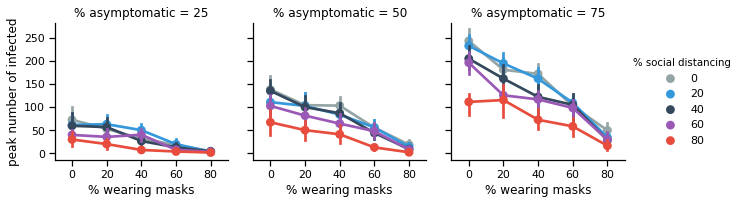

In [36]:
sns.set_context('notebook')
flatui = ["#95a5a6", "#3498db", "#34495e", "#9b59b6", "#e74c3c"]
sns.catplot(x="% wearing masks", y="peak number of infected", 
            col="% asymptomatic", hue="% social distancing",
            palette=flatui, kind="point", n_boot=100,
            height=3,data=sum_df)
plt.savefig('../../sensitivity_analysis.png', dpi=100)
plt.show()

In [26]:
print(type([0]) == 'list')

False
